# Introducing [Scikit-Learn](http://scikit-learn.org)

- There are several Python libraries which provide a range of machine learning algorithms. Scikit-Learn is one of the best known examples.
- We will start by covering *data representation*, then the *Estimator* API, then follow an example using the digits dataset.

### Data Representation

#### Data as tables
- A basic table is a 2D grid. Rows represent individual elements of the dataset; columns represent qualities (features) of each element.
- Download the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) into a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Features matrix

- By convention, this matrix is stored in a variable named ``X`` with a shape described by ``[n_samples, n_features]``. It is most usually in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.
- Samples (i.e., rows) always refer to individual objects described by the dataset. (flowers, people, documents, etc.)
- Features (i.e., columns) always refer to the observations that describe each sample. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

- We also typically have a *label* or *target* array, which is usually named. ``y``. It is usually one dimensional, with length ``n_samples``, and is contained in a NumPy array or Pandas ``Series``. It may have continuous numerical values, or discrete classes/labels.
- While some Scikit-Learn estimators can handle multiple target values via a two-dimensional, ``[n_samples, n_targets]`` target array, we will mostly use a one-dimensional target array.
- The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable. In this example we want to predict the flower species based on other data. (ie the ``species`` column is the target array.)
- Use a Seaborn __pairplot__ to visualize the data:

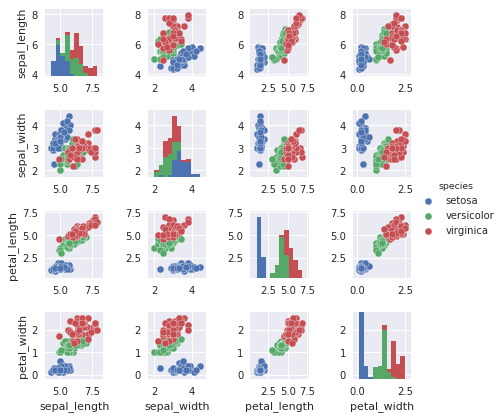

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

- First: extract the features matrix. Second: extract the species data for the target array. The expected layout of features and target values is shown below.

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

![](figures/05.02-samples-features.png)

## Scikit-Learn's Estimator API

- Introduced in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238) 

### Simple linear regression

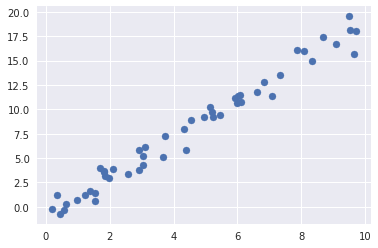

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

- Every model is represented by a Python class. For example, if we want to use a linear regression model, we can import the linear regression class:

In [6]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

- *a class of model is not the same as an instance of a model*.

- Depending on the model class, we might need to answer one or more questions:

    - Would we like to fit for the offset (i.e., *y*-intercept)?
    - Would we like the model to be normalized?
    - Would we like to preprocess our features to add model flexibility?
    - What degree of regularization would we like to use in our model?
    - How many model components would we like to use?

- These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data. SciKit-Learn hyperparameters are set by passing values at model instantiation.
- Instantiate the ``LinearRegression`` class. Specify that we want fit the intercept using the ``fit_intercept`` hyperparameter.

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 3. Arrange data into a features matrix and target vector

- The target variable ``y`` is already in the correct form (an ``n_samples`` array), but we need to reshape the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

- Apply the model to the data with ``fit()``. The results of the fit are stored in the ``coef_`` attribute varaibles.
- In this case they correspond the input slope (~2.0) and intercept (~-1.0).

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_

array([ 1.9776566])

In [14]:
model.intercept_

-0.90331072553111635

#### 5. Predict labels for unknown data

Predict uses the ``predict()`` method. The "new data" is a grid of *x* values. ``predict()`` returns a set of *y* values.

In [15]:
xfit = np.linspace(-1, 11)
xfit

array([ -1.        ,  -0.75510204,  -0.51020408,  -0.26530612,
        -0.02040816,   0.2244898 ,   0.46938776,   0.71428571,
         0.95918367,   1.20408163,   1.44897959,   1.69387755,
         1.93877551,   2.18367347,   2.42857143,   2.67346939,
         2.91836735,   3.16326531,   3.40816327,   3.65306122,
         3.89795918,   4.14285714,   4.3877551 ,   4.63265306,
         4.87755102,   5.12244898,   5.36734694,   5.6122449 ,
         5.85714286,   6.10204082,   6.34693878,   6.59183673,
         6.83673469,   7.08163265,   7.32653061,   7.57142857,
         7.81632653,   8.06122449,   8.30612245,   8.55102041,
         8.79591837,   9.04081633,   9.28571429,   9.53061224,
         9.7755102 ,  10.02040816,  10.26530612,  10.51020408,
        10.75510204,  11.        ])

- (Like before, we need to reshape these *x* values into a ``[n_samples, n_features]`` features matrix.)

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

- Plot the raw and fitted data:

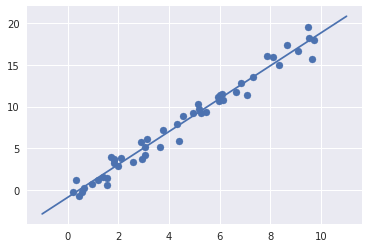

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised learning example: Iris classification

- Question: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?
- Use a simple generative model known as Gaussian naive Bayes, which assumes each class is drawn from an axis-aligned Gaussian distribution.
- Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often used as a baseline due to speed and no need for hyperparameter tuning.
- Split the data into a *training set* and a *testing set* using the ``train_test_split`` utility.

In [20]:
# module deprecated in v0.19 to model_selection
# from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

- Select model, fit to training data (Xtrain, Ytrain), predict labels of test data (Xtest).

In [21]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

- Use the ``accuracy_score`` utility to see how well we did.

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

- 97%. Not bad.

### Unsupervised learning example: Iris dimensionality

- Problem reduce the dimensionality of the Iris data for better visualization.
- Iris data is four dimensional: there are four features recorded for each sample.
- Question: Is there a suitable lower-dimensional representation that retains the essential features of the data?
- Use principal component analysis (PCA), which is a fast linear dimensionality reduction technique. Ask the model to return two components—that is, a two-dimensional representation of the data.

In [23]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

- Plot the results: (insert them into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results.)

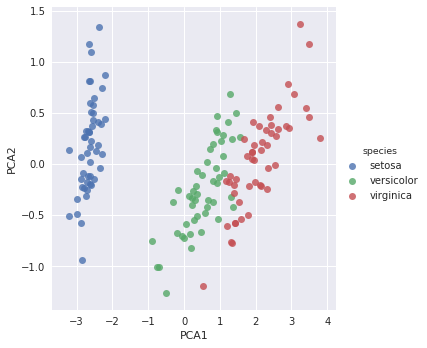

In [24]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

- In 2D the species are well separated even though PCA had no knowledge of the species labels!

### Unsupervised learning: Iris clustering

- Clustering attempts to find distinct groups of data without reference to any labels. Let's try this using a Gaussian mixture model (GMM). A GMM attempts to model the data as a collection of Gaussian blobs.
- Same process: create model, run(), then predict()

In [25]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)                                   
y_gmm = model.predict(X_iris)   

- Add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

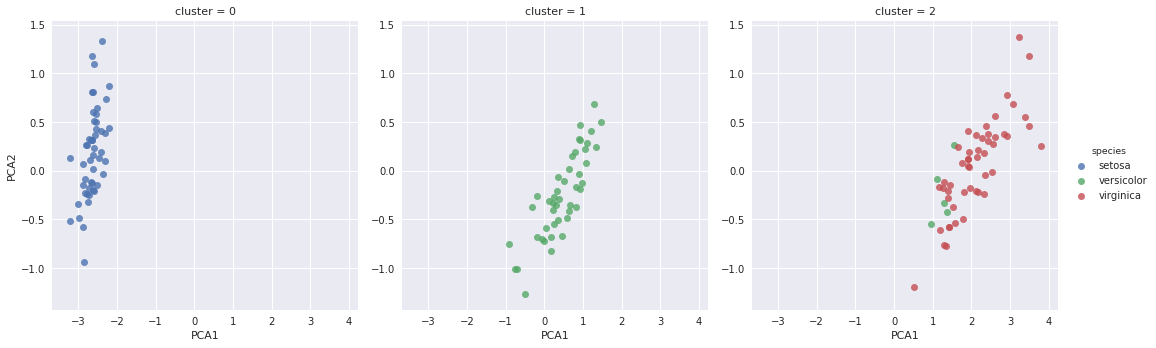

In [26]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

- By splitting the data by cluster, we see how well GMM has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
- This means the measurements of these flowers are distinct enough that we could *automatically* identify the different species with a simple clustering algorithm!

## Application: Exploring Hand-written Digits

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

- The images data is a 3D array: 1,797 samples of an 8×8 grid of pixels. Visualize the first 100 samples.

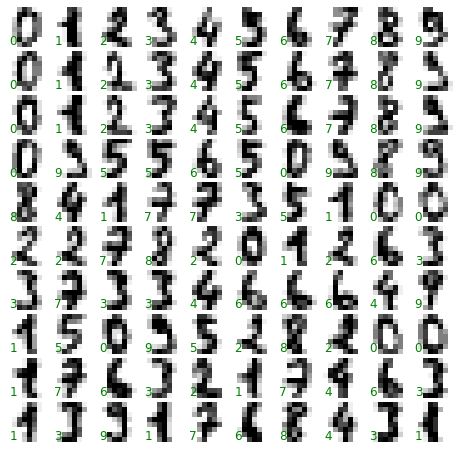

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

- We'll need a 2D ``[n_samples, n_features]`` representation of the data. Do this by treating each pixel in the image as a feature (by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.)
- We also need the target array, which provides the label for each digit.
- These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes.

In [29]:
X = digits.data
X.shape

(1797, 64)

In [30]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

- We want to see our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Let's reduce the dimensions to 2, using an unsupervised method. Use a manifold learning algorithm called *Isomap*, and transform the data to two dimensions:

In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

- OK, the projected data is now two-dimensional. What does it look like?

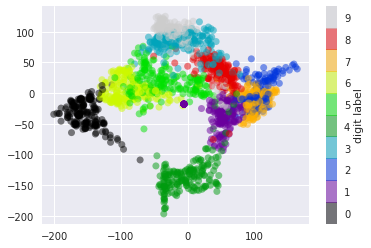

In [33]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

- This plot gives us good intuition into how well various numbers are separated in the larger 64-dimensional space.
    - Zeros (in black) and ones (in purple) have very little overlap in parameter space. This makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
    - There seems to be a continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.
    - Overall, different groups appear to be fairly well separated in the parameter space: this tells us that a straightforward supervised classification algorithm should perform suitably on this data.

### Classification on digits

- As with the Iris data: split the data into training and testing sets, then fit a Gaussian naive Bayes model against the test data.

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

- How's the accuracy?

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

- 80% is OK, but where's our errors? Let's use a *confusion matrix* to find out.

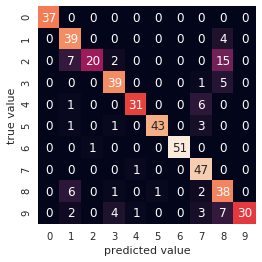

In [39]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

- For example, a large number of twos here are mis-classified as either ones or eights.
- Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. (Green for correct labels, red for incorrect labels.)

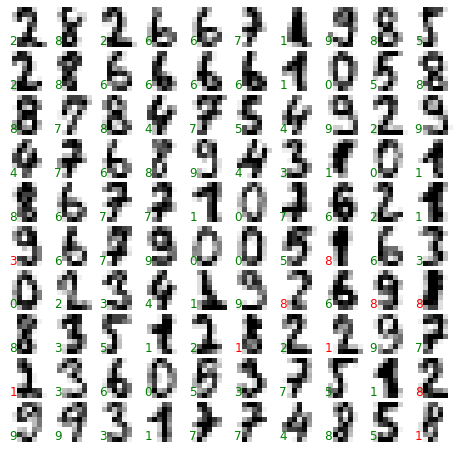

In [40]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')